In [154]:
# Cálculo de isoyetas y polígonos de thiessen.

import numpy as np
import pandas as pd

from scipy import spatial

from matplotlib import pyplot as plt

import geopandas as gpd
import shapely as shp

In [155]:
# Dirección de los datos.
path = "../Material/Clases/Clase 8/"

# Nombre de la cuenca.
nombres_sub = "RH19Be_subc.shp"

# Datos de estaciones.
nombre_e = "Estaciones_Guerrero_1980.csv"

In [156]:
# Abrimos la subcuenca.

Cuenca = gpd.read_file(path + nombres_sub)

# A coordenadas UTM 14N (m).
Cuenca = Cuenca.to_crs(32614)

# Datos.
print(Cuenca.loc[0])


# Forma de la cuenca.
Cuenca.explore()

ID                                                        155.0
CVE_SUBCUE                                               RH19Be
CVE_RH                                                     RH19
RH                                                 COSTA GRANDE
CVE_CUE                                                       B
CUENCA                                    R. COYUQUILLA Y OTROS
CVE_SUBC                                                      e
SUBCUENCA                                           R. Petatlán
AREA_KM2                                                 548.64
PERIMETRO                                                142.88
TIPO                                                    ABIERTA
DRENAJE1                                                 RH19Bf
DESCARGA1                                                     1
DRENAJE2                                                      -
DESCARGA2                                                     0
DRENAJE3                                

In [157]:
# Abrimos las estaciones ubicadas en guerrero.

df = pd.read_csv(path + nombre_e, index_col = "NUMERO" )

# Creamos un punto con las coordenadas.
# Vacío.
df["geometry"] = None
df["geometry"] = gpd.points_from_xy(df["LONGITUD"], df["LATITUD"])

df

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry
NUMERO,,,,,,
12064,PETATLAN,Guerrero,-101.3,17.5,926,POINT (-101.30000 17.50000)
12174,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (-101.20000 17.50000)
12025,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (-101.10000 17.40000)
12017,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (-101.00000 17.60000)
12140,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (-100.90000 17.70000)
12038,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (-100.90000 17.50000)
12054,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (-101.10000 17.80000)
12094,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (-101.10000 18.00000)
12094,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (-101.40000 17.90000)


In [158]:
# Creamos un GeoDataFrame.
Estaciones = gpd.GeoDataFrame(df, geometry = "geometry", crs = 4326)
# A coordenadas UTM 14N (m).
Estaciones = Estaciones.to_crs(32614)

# Actualizamos x, y.
Estaciones["x"] = Estaciones.centroid.x
Estaciones["y"] = Estaciones.centroid.y

# Datos
Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y
NUMERO,,,,,,,,
12064,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06
12174,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06
12025,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06
12017,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06
12140,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06
12038,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06
12054,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06
12094,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06
12094,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06


In [159]:
# Graficamos las estaciones.
Estaciones.explore()

# Isoyetas

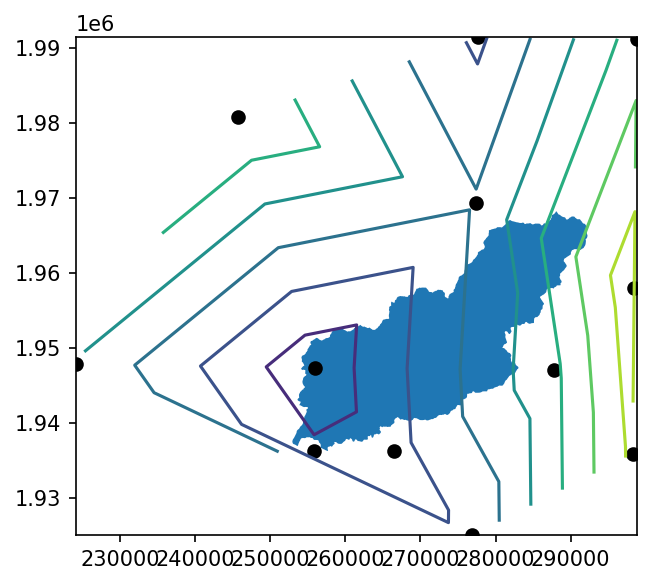

In [160]:
# Isoyetas

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Graficamos la cuenca.
Cuenca.plot(ax = ax)
# Graficamos las estaciones.
Estaciones.plot(ax = ax, color = "k")

# Graficamos las isoyetas y las guardamos en una variable.
isoyetas = ax.tricontour( Estaciones["x"],
    Estaciones["y"], Estaciones["HP_1980"] )

fig.tight_layout()
plt.show()

In [161]:
# Atributos de las isoyetas.

# Valores de cada isoyeta.
print( isoyetas.levels )

# Coordenadas de las isoyetas.
# allsegs es una lista de listas.
# allsegs[2] contiene todas las isoyetas de nivel levels[1].
# allsegs[2][0] es la primera isoyeta de nivel levels[1].
isoyetas.allsegs

[ 750.  900. 1050. 1200. 1350. 1500. 1650. 1800. 1950.]


[[],
 [array([[ 254600.33545736, 1951727.82919118],
         [ 261489.5903632 , 1953091.51253328],
         [ 261148.48180079, 1947354.52255686],
         [ 261462.84235565, 1941496.02594604],
         [ 255810.35672456, 1938444.39816142],
         [ 249431.37305316, 1947497.82060127],
         [ 254600.33545736, 1951727.82919118]])],
 [array([[ 278882.65808243, 1991431.8065039 ],
         [ 277607.82210509, 1987885.06836808],
         [ 276023.94365481, 1990901.50531276]]),
  array([[ 252818.3735017 , 1957557.48138489],
         [ 269017.43233436, 1960763.98005415],
         [ 268215.36625517, 1947274.30092041],
         [ 268745.01328675, 1937403.67532336],
         [ 273743.08107074, 1928400.93084312],
         [ 273724.65189621, 1926733.82193754],
         [ 246144.66364895, 1939833.23401225],
         [ 240664.32676751, 1947611.24497078],
         [ 252818.3735017 , 1957557.48138489]])],
 [array([[ 251091.50989144, 1936166.4071275 ],
         [ 234483.07323577, 1944054.76276126],


In [162]:
# Extraemos las isoyetas y las convertimos en curvas de Shapely.

# Lista con el nivel de las isoyetas repetido
# por cada isoyeta que haya en ese nivel.
hp_level = []
# Cantidad de isoyetas que tiene un nivel.
level_n  = []
# Curvas de cada isoyeta.
level_c  = []

# Iteramos para todos los grupos de isoyetas allsegs.
# Evitamos el primer y último grupo que están vacíos.
for i in range( len(isoyetas.allsegs[1:-1]) ):
    # Contamos la cantidad de isoyetas que hay en un grupo, lo agregamos
    # a la lista level_n e imprimimos los valores.
    level_n.append( len( isoyetas.allsegs[1 + i] ) )
    print(f"nivel {i}: {level_n[i]}")

    # Copiamos el nivel de la isoyeta tantas
    # veces como isoyetas haya en ese nivel.
    hp_level = hp_level + [isoyetas.levels[i]] * level_n[i]

    # Entramos en cada grupo i, que tiene una cantidad level_n[i]
    # de elementos dentro, convertimos cada elemento en una
    # geometría de shapely y lo metemos dentro de una lista
    # de una sola dimensión (como hacer flatten).
    for j in range( 0, level_n[i] ):
        level_c.append( shp.geometry.LineString(isoyetas.allsegs[i + 1][j]) )

nivel 0: 1
nivel 1: 2
nivel 2: 2
nivel 3: 2
nivel 4: 2
nivel 5: 1
nivel 6: 1


In [163]:
# Creamos un DataFrame con los niveles de isoyetas.
df_is = pd.DataFrame(hp_level, columns = ["hp [mm]"])
# Agregamos las geometrías de shapely.
df_is["geometry"] = level_c
# Convertimos en un GeoDataFrame.
df_is = gpd.GeoDataFrame(df_is)
# Establecemos que hemos estado trabajando con coordenadas UTM 14N (m).
df_is = df_is.set_crs(32614)

df_is

,hp [mm],geometry
0,750.0,"LINESTRING (254600.335 1951727.829, 261489.590..."
1,900.0,"LINESTRING (278882.658 1991431.807, 277607.822..."
2,900.0,"LINESTRING (252818.374 1957557.481, 269017.432..."
3,1050.0,"LINESTRING (251091.510 1936166.407, 234483.073..."
4,1050.0,"LINESTRING (284670.375 1991369.350, 277419.745..."
5,1200.0,"LINESTRING (225172.646 1949509.497, 249254.450..."
6,1200.0,"LINESTRING (290458.091 1991306.894, 285542.802..."
7,1350.0,"LINESTRING (235553.211 1965292.325, 247472.488..."
8,1350.0,"LINESTRING (296245.808 1991244.437, 294728.184..."
9,1500.0,"LINESTRING (298656.347 1973948.302, 298747.581..."


In [164]:
# Graficamos las isoyetas.
df_is.explore()

In [165]:
df_is["IS_SUBC"] = df_is.geometry.intersection( Cuenca.loc[0, "geometry"] )
df_is = df_is.set_geometry("IS_SUBC")
subc_is = df_is[ ~ df_is.is_empty ].reset_index(drop = True).copy()
subc_is["AREA_SUBC"] = None

for i in range( subc_is.shape[0] ):
    subc_is.loc[i, "AREA_SUBC"] = shp.ops.split(
        Cuenca.loc[0, "geometry"], subc_is.loc[i, "geometry"])[1]

subc_is

,hp [mm],geometry,IS_SUBC,AREA_SUBC
0,750.0,"LINESTRING (254600.335 1951727.829, 261489.590...","MULTILINESTRING ((258599.423 1952519.423, 2594...","POLYGON ((254388.1753897884 1940462.840137913,..."
1,900.0,"LINESTRING (252818.374 1957557.481, 269017.432...","LINESTRING (268800.464 1957114.861, 268215.366...","POLYGON ((268590.681419018 1940279.840001485, ..."
2,1050.0,"LINESTRING (251091.510 1936166.407, 234483.073...","LINESTRING (276103.776 1961011.034, 275282.251...","POLYGON ((275516.3037903667 1942832.211487478,..."
3,1200.0,"LINESTRING (290458.091 1991306.894, 285542.802...","MULTILINESTRING ((281555.199 1966672.696, 2829...","POLYGON ((282699.2418476067 1953002.183993572,..."
4,1350.0,"LINESTRING (296245.808 1991244.437, 294728.184...","LINESTRING (286825.851 1966526.871, 286100.848...","POLYGON ((287108.4491151244 1957970.667821554,..."
5,1500.0,"LINESTRING (298656.347 1973948.302, 298747.581...","LINESTRING (292170.792 1965956.602, 291080.240...","POLYGON ((291080.2403810727 1963128.163551579,..."


<AxesSubplot:>

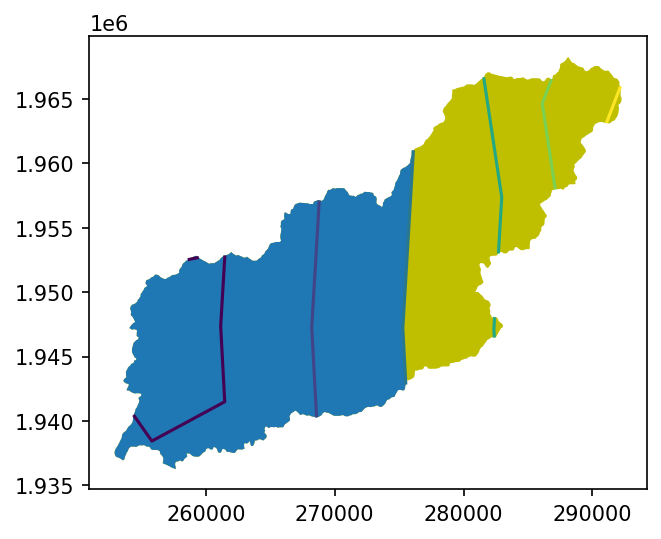

In [166]:
# Áreas de isoyetas.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Graficamos la cuenca.
Cuenca.plot(ax = ax, color = "y")
subc_is.set_geometry("IS_SUBC").plot("hp [mm]", ax = ax)
subc_is.set_geometry("AREA_SUBC").loc[[2]].plot(ax = ax)

# Polígonos de Thiessen

In [167]:
buffer = 10000
bounds = Cuenca.total_bounds
bbox = [ [ bounds[0] - buffer, bounds[1] - buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[1] - buffer ],
         [ bounds[2] + buffer, bounds[1] - buffer ],
         [ bounds[2] + buffer, ( bounds[1] + bounds[3] ) / 2 ],
         [ bounds[2] + buffer, bounds[3] + buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[3] + buffer ],
         [ bounds[0] - buffer, bounds[3] + buffer ],
         [ bounds[0] - buffer, ( bounds[1] + bounds[3] ) / 2 ] ]
for i in range( len(bbox) ):
    bbox[i] = ( [f"B{i + 1}"] + [None] * 4
        + [shp.geometry.Point(bbox[i]), bbox[i][0], bbox[i][1] ] )
Estaciones = pd.concat([Estaciones,
    pd.DataFrame(bbox, columns = Estaciones.columns)]
    ).reset_index( drop = True )

Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y
0,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06
2,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06
7,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06
8,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334,POINT (224065.386 1947825.995),224065.385800,1.947826e+06


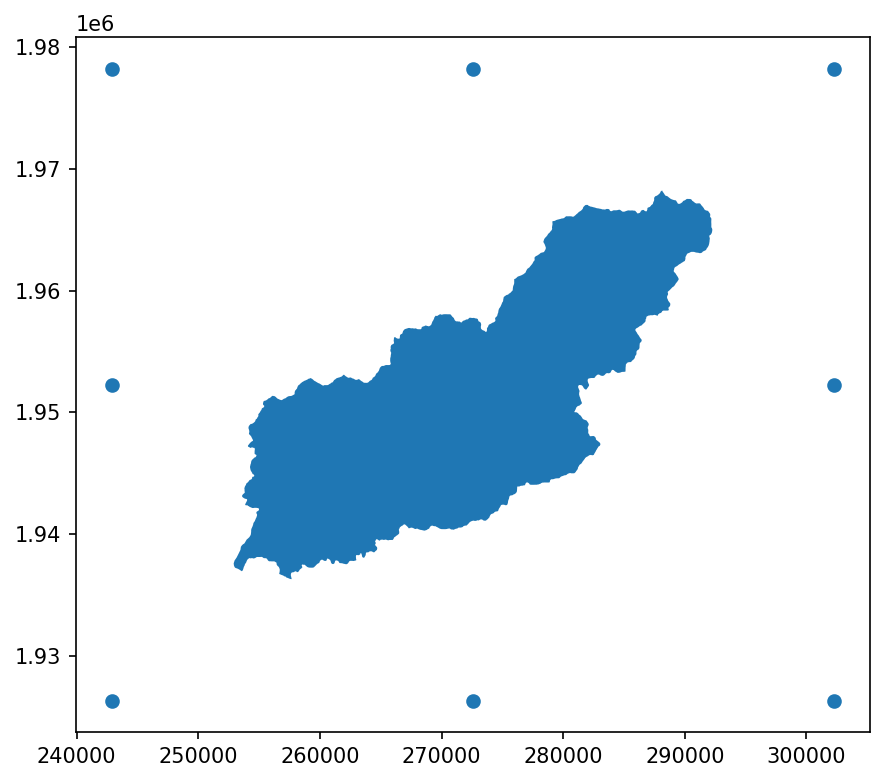

In [168]:
# Límites

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos las subcuenca.
Cuenca.plot(ax = ax)
# Graficamos los límites.
Estaciones[12:].plot(ax = ax)

fig.tight_layout()
plt.show()

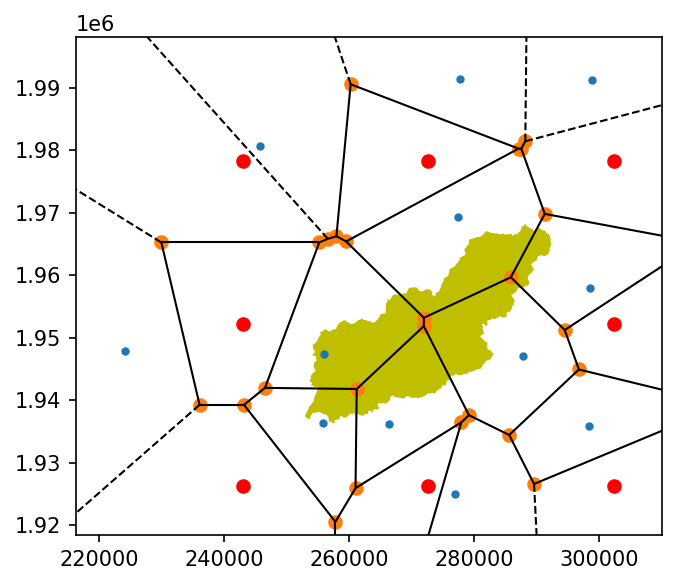

In [170]:
# Polígonos de Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Graficamos la cuenca.
Cuenca.plot(ax = ax, color = "y", zorder = 1)
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax, zorder = 2)
# Graficamos los límites.
Estaciones.loc[12:, "geometry"].plot(ax = ax, color = "r", zorder = 3)

fig.tight_layout()
plt.show()

In [171]:
# Atributos de los polígonos de Thiessen.

# Vértices --> Centroides de la triangulación.
print( Thiessen.vertices )
print()

# Indica la posición en region que corresponde a cada punto.
print( Thiessen.point_region )

# Índices de los vértices que forman cada polígono.
# Una lista vacía es un polígono "virtual" de apoyo, hay que ignorarlo.
# Un valor negativo es un vértice de apoyo en una posición muy
# lejana (infinito); no podemos definir ese polígono.
Thiessen.regions

[[ 229907.27489689 1965255.35797575]
 [ 255169.68421512 1965255.35797575]
 [ 236027.10230041 1939278.0023067 ]
 [ 256548.65857403 1965836.9954216 ]
 [ 257915.94441557 1966254.93653904]
 [ 260192.68878743 1990566.51635186]
 [ 257750.97945917 1920562.7387156 ]
 [ 246488.25590059 1941992.06658831]
 [ 243130.25443084 1939278.0023067 ]
 [ 289535.27040358 1926619.09683901]
 [ 257750.97945917 1867397.22083632]
 [ 285558.48038493 1934452.28469209]
 [ 259466.32456225 1965416.74818196]
 [ 271910.84550036 1953206.80571248]
 [ 287054.24651695 1980268.14399874]
 [ 271895.6717485  1951870.11955308]
 [ 261161.51633714 1941814.35692201]
 [ 260974.06916303 1925948.99712469]
 [ 277905.94004184 1936487.20360128]
 [ 279120.36731516 1937626.85999104]
 [ 285819.52743235 1959687.28534177]
 [ 291248.17169748 1969826.26395093]
 [ 288132.85034559 1981450.90581598]
 [ 287495.74797176 1980263.16812984]
 [ 296712.82768472 1944934.84007442]
 [ 294440.85336043 1951249.00560519]
 [ 319968.593924   1939278.0023067 ]
 

[[2, -1, 0],
 [-1, 3, 4, 5],
 [-1, 0, 1, 3],
 [8, 2, 0, 1, 7],
 [-1, 2, 8, 6, 10],
 [14, 5, 4, 12],
 [19, 15, 16, 17, 18],
 [16, 7, 1, 3, 4, 12, 13, 15],
 [17, 6, 8, 7, 16],
 [18, 10, 6, 17],
 [19, 11, 9, -1, 10, 18],
 [23, 14, 12, 13, 20, 21],
 [-1, 22],
 [23, 14, 5, -1, 22],
 [],
 [27, 25, 24, 26, -1],
 [25, 20, 13, 15, 19, 11, 24],
 [26, 9, 11, 24],
 [27, 21, 20, 25],
 [-1, 9, 26],
 [27, 21, 23, 22, -1]]

In [173]:
# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Lista de geometrías de Shapely.
Poly_th = []

# Iteramos para cada lista de vértices que forman un polígono.
for i in Thiessen.point_region:

    # Creamos la lista de vértices.
    Ver_th = []

    # Saltamos las listas vacías.
    if len(Thiessen.regions[i]) == 0: pass
    else:
        if -1 in Thiessen.regions[i]:
            Poly_th.append( shp.geometry.Polygon( ) )

        # Agregamos cada vértice que corresponde al polígono de Thiessen.
        else:
            for j in Thiessen.regions[i]:
                Ver_th.append( Thiessen.vertices[j] )

            # Agregamos nuevamente el primer vértice para cerrar el polígono.
            Ver_th.append( Ver_th[0] )

            # Convertimos a geometría de shapely.
            Poly_th.append( shp.geometry.Polygon( Ver_th ) )

# Creamos una columna del GeoDataframe con los polígonos de Thiessen.
Estaciones["Thiessen"] = Poly_th
# Establecemos como la geometría de trabajo.
Estaciones = Estaciones.set_geometry("Thiessen")

Estaciones


,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen
0,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((260974.069 1925948.997, 257750.979 1..."
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((279120.367 1937626.860, 271895.672 1..."
2,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06,GEOMETRYCOLLECTION EMPTY
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((294440.853 1951249.006, 285819.527 1..."
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((315810.776 1965255.358, 291248.172 1..."
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06,"POLYGON ((319968.594 1939278.002, 289535.270 1..."
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((287495.748 1980263.168, 287054.247 1..."
7,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06,GEOMETRYCOLLECTION EMPTY
8,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06,GEOMETRYCOLLECTION EMPTY
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334,POINT (224065.386 1947825.995),224065.385800,1.947826e+06,GEOMETRYCOLLECTION EMPTY


In [177]:
# Como los polígonos de thiessen externos se extienden hasta el infinito,
# no es posible graficarlos directamente.

# Calculamos el área de influencia de la estación como la parte
# de la cuenca que cae dentro de cada polígono de thiessen.
Estaciones["Area_Influencia"] = Estaciones["Thiessen"].intersection(
    Cuenca.loc[0, "geometry"])

# Establecemos el área de influencia como la geometría de trabajo.
Estaciones = Estaciones.set_geometry("Area_Influencia")

subc_th = Estaciones[ ~ Estaciones.is_empty ].copy()
subc_th[f"{Cuenca.loc[0, 'CVE_SUBCUE']}_AREA"] = subc_th.area

subc_th

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen,Area_Influencia,RH19Be_AREA
0,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((260974.069 1925948.997, 257750.979 1...","POLYGON ((261161.516 1941814.357, 261110.999 1...",3.168658e+07
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((279120.367 1937626.860, 271895.672 1...","POLYGON ((261161.516 1941814.357, 271895.672 1...",1.036975e+08
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((294440.853 1951249.006, 285819.527 1...","POLYGON ((271895.672 1951870.120, 271910.846 1...",1.210838e+08
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((315810.776 1965255.358, 291248.172 1...","POLYGON ((285819.527 1959687.285, 289958.926 1...",2.549987e+07
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((287495.748 1980263.168, 287054.247 1...","POLYGON ((285819.527 1959687.285, 271910.846 1...",1.181229e+08
10,SAN JERONIMITO,Guerrero,-101.3,17.6,789,POINT (255918.987 1947413.887),255918.987305,1.947414e+06,"POLYGON ((261161.516 1941814.357, 246488.256 1...","POLYGON ((254894.282 1941890.260, 254911.504 1...",1.488197e+08


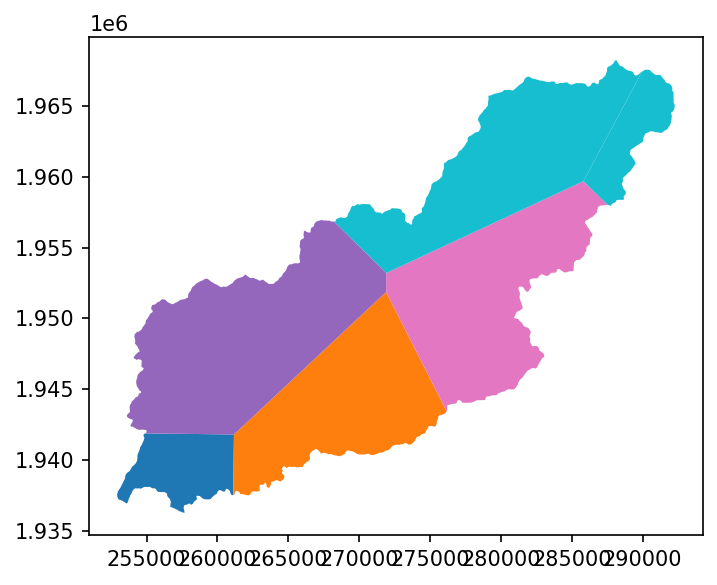

In [178]:
# Áreas de influencia

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Graficamos las áreas de influencia.
Estaciones.plot("HP_1980", ax = ax)

fig.tight_layout()
plt.show()

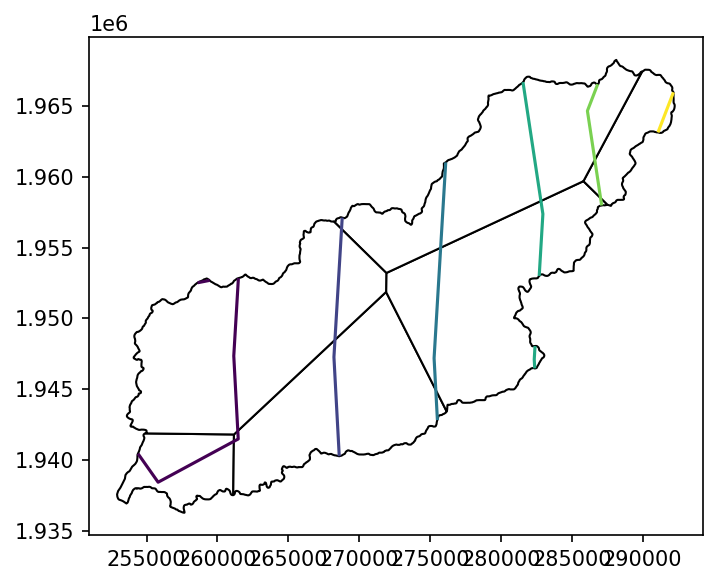

In [179]:
# Isoyetas + Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

Cuenca.plot(ax = ax)
Estaciones.plot(ax = ax, color = "w", edgecolor = "k")
subc_is.plot("hp [mm]", ax = ax)

fig.tight_layout()
plt.show()

# Hietogramas y curva masa.

In [ ]:
# Hietogramas y curva masa.

# Cargamos un pluviograma.
# skiprows se salta n filas que no forman parte de la tabla.
df = pd.read_csv( "../Material/Estacion_VILLAHERMOSA__90_dias.csv",
    skiprows = 8, index_col = "Fecha Local")
df.index = pd.to_datetime( df.index )

# Escogemos la tormenta del 10 de enero de 2023.
# & combina dos conddiciones a la vez.
tormenta = df.loc[ df.index.month.isin([1]) & df.index.day.isin([10]),
    ["Precipitacion (mm)"] ].iloc[81:95].sort_index()

<AxesSubplot:xlabel='Fecha Local'>

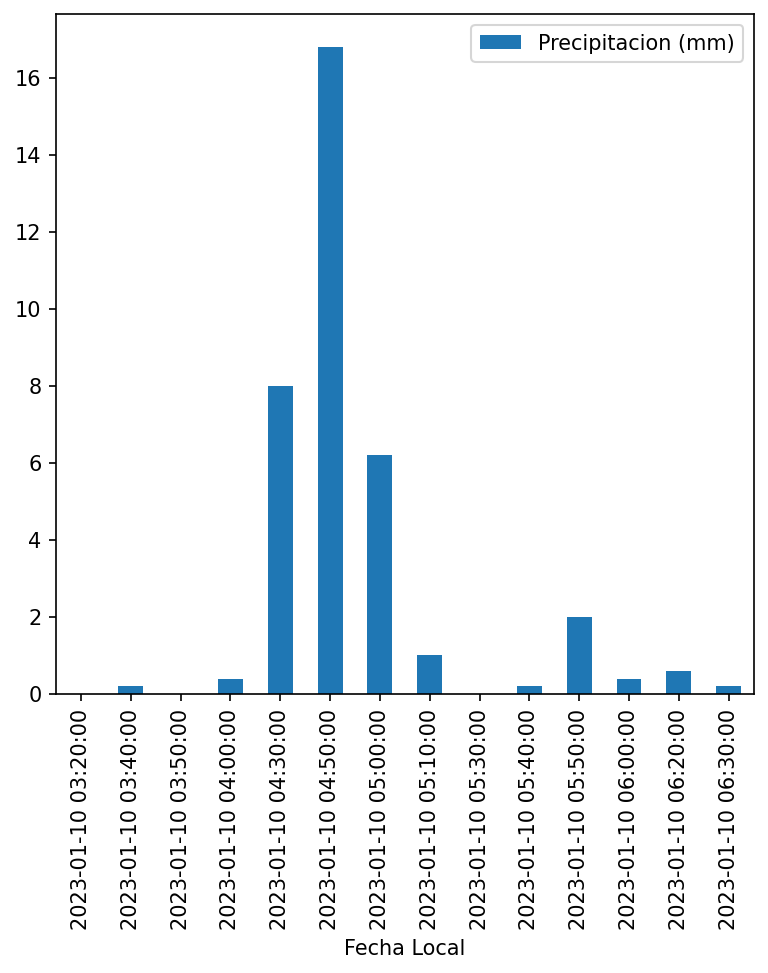

In [ ]:
# Hietograma de precipitación.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos como barras.
tormenta.plot.bar(ax = ax)

In [ ]:
# Calculamos el delta de tiempo.
print( tormenta.index[1] - tormenta.index[0] )
dt = 10 / 60

0 days 00:20:00


In [ ]:
# Calculamos el hietograma de intensidad y la curva masa acumulada.
tormenta["Intensidad [mm/h]"] = tormenta["Precipitacion (mm)"] / dt
tormenta["Curva masa [mm]"]   = tormenta["Precipitacion (mm)"].cumsum()

tormenta

,Precipitacion (mm),Intensidad [mm/h],Curva masa [mm]
Fecha Local,,,
2023-01-10 03:20:00,0.0,0.0,0.0
2023-01-10 03:40:00,0.2,1.2,0.2
2023-01-10 03:50:00,0.0,0.0,0.2
2023-01-10 04:00:00,0.4,2.4,0.6
2023-01-10 04:30:00,8.0,48.0,8.6
2023-01-10 04:50:00,16.8,100.8,25.4
2023-01-10 05:00:00,6.2,37.2,31.6
2023-01-10 05:10:00,1.0,6.0,32.6
2023-01-10 05:30:00,0.0,0.0,32.6


<AxesSubplot:xlabel='Fecha Local'>

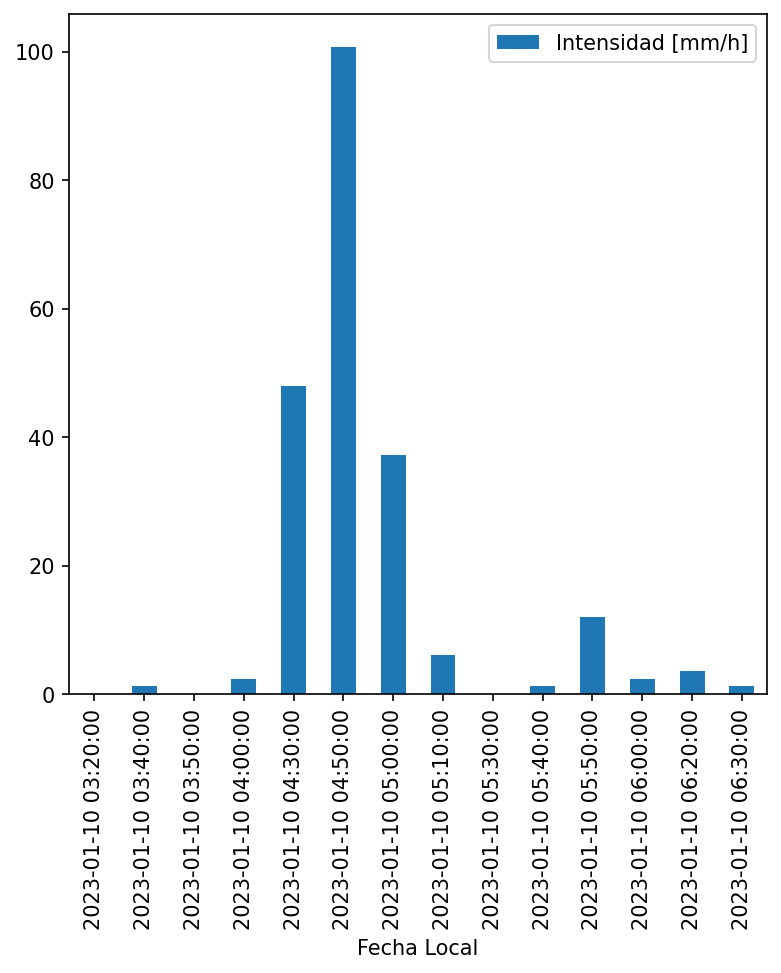

In [ ]:
# Hietograma de intensidad.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Ponemos el nombre de la columna dentro de corchetes para tener un
# DataFrame y no una Serie.
tormenta[["Intensidad [mm/h]"]].plot.bar(ax = ax)

<AxesSubplot:xlabel='Fecha Local'>

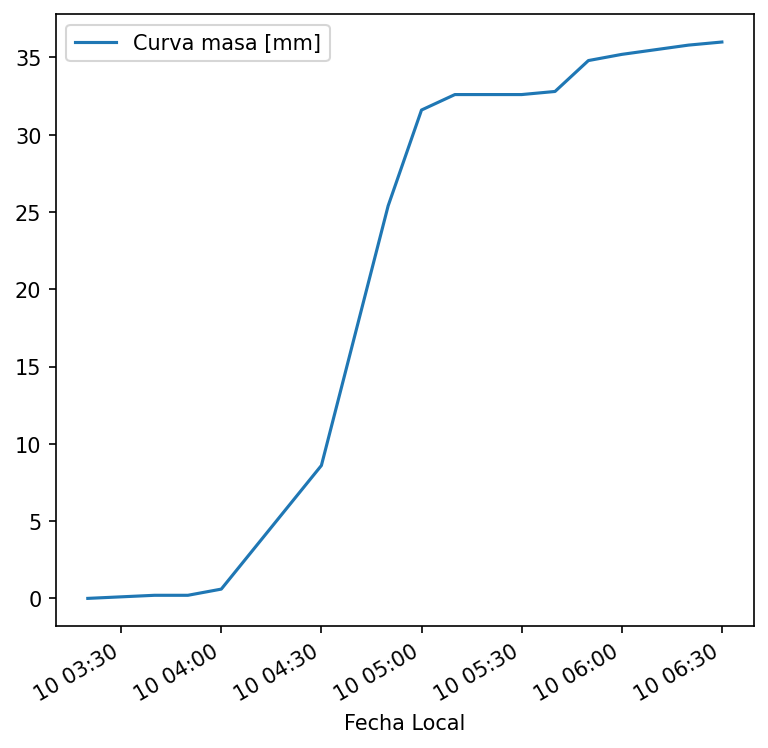

In [ ]:
# Curva masa.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

tormenta[["Curva masa [mm]"]].plot(ax = ax)

In [ ]:
# Duración.

# Copiamos la columna de curva masa a un nuevo dataframe.
dur = tormenta[["Curva masa [mm]"]].copy()

# Para cada duración desde dt hasta dt * cantidad de filas, la duración
# es la curva masa menos la curva masa recorrida.
for i in range( 1, dur.shape[0] ):
    dur[dt * i ] = dur["Curva masa [mm]"] - dur["Curva masa [mm]"].shift(i)

# Quitamos la columna de la curva masa.
dur.drop("Curva masa [mm]", axis = 1, inplace = True)

# Creamos un nuevo dataframe para la tabla de duración.
dur = pd.DataFrame(dur.max(axis = 0), columns = ["delta hp max"] )
dur.index.name = "Duración"

dur

,delta hp max
Duración,
0.16666666666666666,16.8
0.3333333333333333,24.8
0.5,31.0
0.6666666666666666,32.0
0.8333333333333333,32.4
1.0,32.4
1.1666666666666665,34.2
1.3333333333333333,34.6
1.5,35.2
